<a href="https://colab.research.google.com/github/Sotsil/Proyecto_DS_Bedu/blob/main/Modulo3_Python_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aumento en la temperatura global y emisiones de Carbono

Desde 1980 se ha registrado un incremento en la temperatura global. Uno de los principales causantes de este incremento es el aumento en la generación de gases de efecto invernadero (principalmente dioxido de carbono).

El presente proyecto se enfoca en **analizar los incrementos promedio en la temperatura global y en las emisiones de CO2**.

Datos publicos y de libre acceso tomados de:


> Agencia Internacional de Energía (https://www.iea.org/reports/global-energy-review-co2-emissions-in-2021-2)



> Berkeley Earth (http://berkeleyearth.org/global-temperature-report-for-2021/)




In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
year_anom = pd.read_csv('/content/drive/MyDrive/DaSc22005/Modulo3_Python/Global_annual_anom.csv')

Importación de los datos y dimensiones del dataframe 

In [38]:
year_anom.shape

(1452, 12)

In [39]:
year_anom.head()

,"Year,","Month,",Month Anomaly,Unc.,Annual Anomaly,Unc..1,5-year Anomaly,Unc..2,10-year Anomaly,Unc..3,20-year Anomaly,Unc..4
0,1900,1,-1.018,0.228,-0.039,0.113,-0.142,0.083,-0.258,0.071,-0.352,0.062
1,1900,2,0.013,0.347,-0.034,0.112,-0.143,0.083,-0.259,0.071,-0.351,0.062
2,1900,3,0.298,0.272,-0.046,0.111,-0.147,0.084,-0.258,0.071,-0.349,0.062
3,1900,4,-0.107,0.268,-0.018,0.108,-0.155,0.086,-0.262,0.071,-0.347,0.062
4,1900,5,0.277,0.344,-0.081,0.103,-0.162,0.089,-0.261,0.071,-0.345,0.062


In [40]:
year_anom.tail()

,"Year,","Month,",Month Anomaly,Unc.,Annual Anomaly,Unc..1,5-year Anomaly,Unc..2,10-year Anomaly,Unc..3,20-year Anomaly,Unc..4
1447,2020,8,1.193,0.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,2020,9,1.516,0.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449,2020,10,1.159,0.086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,2020,11,1.703,0.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,2020,12,1.064,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columnas del dataframe y tipos de datos



In [41]:
year_anom.dtypes

Year,                int64
Month,               int64
Month Anomaly      float64
Unc.               float64
Annual Anomaly     float64
Unc..1             float64
5-year Anomaly     float64
Unc..2             float64
10-year Anomaly    float64
Unc..3             float64
20-year Anomaly    float64
Unc..4             float64
dtype: object

In [42]:
year_anom.columns

Index(['Year,', 'Month,', 'Month Anomaly', 'Unc.', 'Annual Anomaly', 'Unc..1',
       '5-year Anomaly', 'Unc..2', '10-year Anomaly', 'Unc..3',
       '20-year Anomaly', 'Unc..4'],
      dtype='object')

Gráfico para observar la tendencia de la temperatura desde 1900

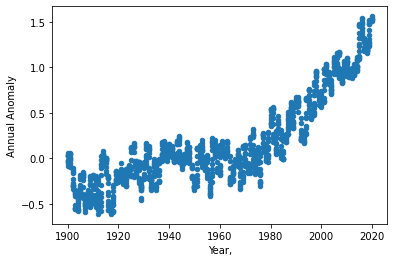

In [43]:
scatter_plot=year_anom.plot.scatter(x='Year,',y='Annual Anomaly')
scatter_plot.plot()
plt.show()

Limpieza del dataframe.
Quitar las columnas que no seran necesarias

In [44]:
year_anom = year_anom.drop(['Unc.','Unc..1',
       '5-year Anomaly', 'Unc..2', '10-year Anomaly', 'Unc..3',
       '20-year Anomaly', 'Unc..4'], axis = 'columns')

In [45]:
year_anom.shape

(1452, 4)

In [46]:
year_anom.columns

Index(['Year,', 'Month,', 'Month Anomaly', 'Annual Anomaly'], dtype='object')

Renombrar las columnas

In [47]:
new_names = {
    'Year,':'year',
    'Month,':'month',
    'Month Anomaly':'month_anomaly(Celsius)',
    'Annual Anomaly':'annual_anomaly(Celsius)'
}

In [48]:
year_anom = year_anom.rename(columns = new_names)

In [49]:
year_anom.head()

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
0,1900,1,-1.018,-0.039
1,1900,2,0.013,-0.034
2,1900,3,0.298,-0.046
3,1900,4,-0.107,-0.018
4,1900,5,0.277,-0.081


In [50]:
year_anom.shape

(1452, 4)

In [51]:
year_anom.columns

Index(['year', 'month', 'month_anomaly(Celsius)', 'annual_anomaly(Celsius)'], dtype='object')

Conteo y limpieza de Nan

In [52]:
year_anom.isna().sum(axis=0) 

year                       0
month                      0
month_anomaly(Celsius)     0
annual_anomaly(Celsius)    6
dtype: int64

In [53]:
year_anom.isna().sum(axis=1) #conteo por filas

0       0
1       0
2       0
3       0
4       0
       ..
1447    1
1448    1
1449    1
1450    1
1451    1
Length: 1452, dtype: int64

In [54]:
year_anom = year_anom.dropna(axis=0, how='any')

In [55]:
year_anom.isna().sum(axis=0) 

year                       0
month                      0
month_anomaly(Celsius)     0
annual_anomaly(Celsius)    0
dtype: int64

In [56]:
year_anom.isna().sum(axis=1) 

0       0
1       0
2       0
3       0
4       0
       ..
1441    0
1442    0
1443    0
1444    0
1445    0
Length: 1446, dtype: int64

In [57]:
year_anom.tail()

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
1441,2020,2,2.085,1.529
1442,2020,3,1.830,1.548
1443,2020,4,1.636,1.525
1444,2020,5,1.421,1.562
1445,2020,6,1.325,1.513


Para analizar la serie de tiempo en necesario dividir los datos, ya que antes de 1980 no es posible encontrar una tendencia, un analisis ARIMA encontraria estacionariedad en los datos.
El dataframe se separa en dos: uno que abarca del año 1900 a 1979 y otro que comprende el periodo entre 1980 al 2020.

Buscar los indices que corresponden al año 1979 para hacer la separación de los datos. 

In [58]:
year_anom[year_anom.year == 1979]

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
948,1979,1,-0.004,-0.040
949,1979,2,-0.343,0.004
950,1979,3,0.205,0.021
951,1979,4,0.061,0.040
952,1979,5,-0.108,0.034
953,1979,6,0.030,0.104
954,1979,7,-0.197,0.128
955,1979,8,0.047,0.197
956,1979,9,0.237,0.191
957,1979,10,0.235,0.229


In [59]:
anom_1900_1979 = year_anom.truncate(before= 0, after=959)
anom_1900_1979

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
0,1900,1,-1.018,-0.039
1,1900,2,0.013,-0.034
2,1900,3,0.298,-0.046
3,1900,4,-0.107,-0.018
4,1900,5,0.277,-0.081
...,...,...,...,...
955,1979,8,0.047,0.197
956,1979,9,0.237,0.191
957,1979,10,0.235,0.229
958,1979,11,0.226,0.281


In [60]:
anom_1980_2020 = year_anom.truncate(before= 960, after=1445)
anom_1980_2020

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
960,1980,1,0.287,0.351
961,1980,2,0.482,0.381
962,1980,3,0.131,0.388
963,1980,4,0.519,0.387
964,1980,5,0.518,0.421
...,...,...,...,...
1441,2020,2,2.085,1.529
1442,2020,3,1.830,1.548
1443,2020,4,1.636,1.525
1444,2020,5,1.421,1.562


Reset al index para que comienze desde 0 y no desde el corte del dataframe anterior.

In [61]:
anom_1980_2020.reset_index(drop=True,inplace= True)

In [62]:
anom_1980_2020

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
0,1980,1,0.287,0.351
1,1980,2,0.482,0.381
2,1980,3,0.131,0.388
3,1980,4,0.519,0.387
4,1980,5,0.518,0.421
...,...,...,...,...
481,2020,2,2.085,1.529
482,2020,3,1.830,1.548
483,2020,4,1.636,1.525
484,2020,5,1.421,1.562


Busqueda de anomalias máximas y mínimas en el periodo de tiempo con tendencia a la alza.

In [63]:
anom_1980_2020['annual_anomaly(Celsius)'].max()

1.562

In [64]:
anom_1980_2020[['annual_anomaly(Celsius)']].idxmax() 

annual_anomaly(Celsius)    484
dtype: int64

In [65]:
anom_1980_2020.iloc[480:486] 

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
480,2020,1,1.952,1.528
481,2020,2,2.085,1.529
482,2020,3,1.830,1.548
483,2020,4,1.636,1.525
484,2020,5,1.421,1.562
485,2020,6,1.325,1.513


In [66]:
anom_1980_2020['annual_anomaly(Celsius)'].min()

-0.012

In [67]:
anom_1980_2020[['annual_anomaly(Celsius)']].idxmin() 

annual_anomaly(Celsius)    60
dtype: int64

In [68]:
anom_1980_2020.iloc[58:63] 

,year,month,month_anomaly(Celsius),annual_anomaly(Celsius)
58,1984,11,-0.227,0.004
59,1984,12,-0.571,0.024
60,1985,1,0.371,-0.012
61,1985,2,-0.481,-0.002
62,1985,3,0.214,-0.008


Exportar los dos dataframes en formato csv.

In [69]:
anom_1980_2020.to_csv('anom_1980_2020')

In [70]:
anom_1900_1979.to_csv('anom_1900_1979')